In [1]:

# Importações padrões
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importações de classe Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.utils import to_categorical

# Importando os dados
from keras.datasets import fashion_mnist, mnist

# Importando ferramentas
from sklearn.model_selection import KFold, RandomizedSearchCV
import tensorflow as tf


In [2]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Vamos agora tratar os códigos para usar no novo modelo.

Com os dados já limpos vamos realizar o desenvolvimento de um modelo base: 
1. Carregando os dados e preparação dos dados
3. Definindo o modelo
4. Medindo o modelo
5. Apresentação de resultados

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


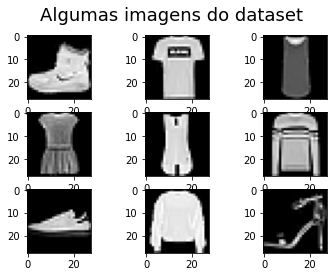

In [4]:

# #Vendo as imagens
plt.suptitle("Algumas imagens do dataset", fontsize = 18)
c = 1
for i in range(9):
 plt.subplot(3, 3, c)
 plt.imshow(X_train[i], cmap='gray')
 c = c + 1
plt.show()

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Estabelecendo as funções para organizar o código

In [7]:
def carregamento_dados():
  
# carregando os dados
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Transformar dados X em array e float
    X_train = X_train.reshape(X_train.shape[0],784 ).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Normaliza os dados em X
    X_train = X_train / 255
    X_test = X_test / 255

# Transformar dados y em array
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test



In [20]:
def modelo_feito():

    # Construindo o modelo
    modelo = Sequential()
    modelo.add(Dense(784, input_shape = (784,), activation = 'relu'))
    #modelo.add(BatchNormalization())
    modelo.add(Dense(1024, activation = 'relu'))
    modelo.add(Dense(2048, activation = 'relu'))
    modelo.add(Dense(2048, activation = 'relu'))
    modelo.add(Dense(10, activation = 'softmax'))

    #compilando o modelo
    modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return modelo


In [21]:
X_train, y_train, X_test, y_test = carregamento_dados()

modelo = modelo_feito()
modelo.summary()
#history = modelo.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test), verbose = 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 784)               615440    
                                                                 
 dense_20 (Dense)            (None, 1024)              803840    
                                                                 
 dense_21 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_22 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_23 (Dense)            (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Avaliando o modelo
def avaliando_modelo(X_train, y_train, n_folds = 5):

# Preparando lista com histórico
    scores = list()
    historico = list()

# Preparando o cross validation
    kf = KFold(n_folds, shuffle = True)
    for XX_train, XX_test in kf.split(X_train):

# Chamando o modelo
      modelo = modelo_feito()

# Preparando o treino e teste
      X_train, y_train, X_test, y_test = X_train[XX_train], y_train[XX_train], X_train[XX_test], y_train[XX_test]

#realizando fit do modelo
      history = modelo.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data=(X_test, y_test), verbose = 0)

# Avaliando modelo
      _, acc = modelo.evaluate(X_test, y_test, verbose=0)
      print('> %.3f' % (acc * 100.0))

# Salvando as métricas
      scores.append(acc)
      historico.append(history)

    return scores, historico

In [ ]:
# plot curva de aprendizado
def curvas_aprendizado(historico):
  for i in range(len(historico)):

 # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(historico[i].history['loss'], color='blue', label='train')
    plt.plot(historico[i].history['val_loss'], color='orange', label='test')

 # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(historico[i].history['accuracy'], color='blue', label='train')
    plt.plot(historico[i].history['val_accuracy'], color='orange', label='test')

  plt.tight_layout(pad=1.0)
  plt.show()

In [ ]:
# resumo de performance
def resumo_scores(scores):
 # print summary
  print('Acuracia: média = %.3f Desvio Padrão = %.3f, qtd_kfold = %d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
 # plot boxplot
  plt.boxplot(scores)
  plt.show()

In [ ]:
## Rodando tudo de uma vez

def todando_tudo():
	# carregando os dados
	X_train, y_train, X_test, y_test = carregamento_dados()
 
	# evaluate model
	scores, historico = avaliando_modelo(X_train, y_train, n_folds = 2)
 
	# curvas de aprendizado
	curvas_aprendizado(historico)
 
	# performance resumida
	resumo_scores(scores)

> 84.473
> 87.440


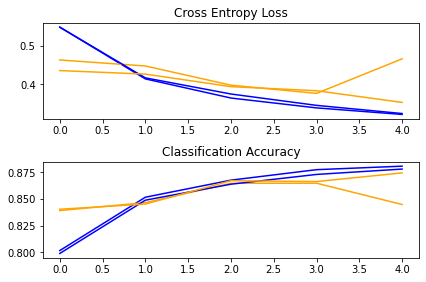

Acuracia: média=85.957 Desvio Padrão=1.483, qtd_kfold=2


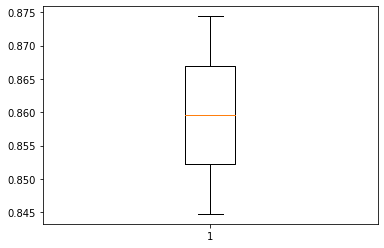

time taken to run: 74.10147714300001


In [ ]:
import time
t1 = time.perf_counter()

todando_tudo()

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

In [ ]:
X_train, y_train, X_test, y_test = carregamento_dados()
modelo = modelo_feito()
historico = modelo.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data=(X_test, y_test), verbose = 0)



In [ ]:
def plot_convergencia(train_accs,test_accs):
  plt.figure()
  plt.plot(train_accs)
  plt.plot(test_accs)
  plt.title('Convergência de treino e test')
  plt.ylabel('Acurácia')
  plt.xlabel('Rodadas')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [ ]:

training_sizes = [10000, 20000, 30000, 40000, 50000, 60000]
train_accs = []
test_accs = []

for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    #modelo.set_weights(initial_weights)
    modelo.fit(X_train_frac, y_train_frac, epochs = 5)

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(modelo.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(modelo.evaluate(X_train, y_train)[1])
    
# Plot train vs test accuracies
plot_convergencia(train_accs,test_accs)

# Trabalhando com o VGG

A VGG16 inicialmente foi treinada para imagens coloridas. Portanto, é necessário que ela receba imagens com canais de cor. Ou seja, cada pixel da imagem será representado por mais de um valor. Tipicamente, utilizamos o sistema de cor RGB, ou seja, cada pixel da imagem é composto por três valores. Podemos dizer, portanto, que uma imagem de 32 pixels de largura e 32 pixels de altura no sistema RGB tem uma dimensionalidade de 32x32x3.

Como as imagens do Fashion MNIST são em tons de cinza (ou seja, só possuem um canal de cor e, portanto, cada imagem tem o tamanho 28x28x1), é necessário redimensionar as imagens do dataset para 32x32x3, adicionando outros dois canais para usar o VGG16. 



In [ ]:
modelo_vgg = VGG16()

NameError: ignored